# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.sparse import diags
%matplotlib inline

import autograd
import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## 1. Data

https://github.com/HyTruongSon/Pattern-Classification/tree/master/MIT-CBCL-database

(6977, 361)


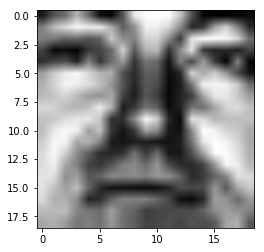

In [2]:
X = open('./svm.train.normgrey').readlines()
X = np.array([[float(yy) for yy in xx.split()[:-1]] for xx in X[2:] if xx.strip() != ""])
print (X.shape)
plt.imshow(X[100].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

## 2. PCA

In [3]:
# Definition and parameter settings

X = np.transpose(X)

def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

(d, N) = X.shape
q = 49

print ("d",  d)
print ("N", N)
print ("q", q)

print ("X", (d, N))
print ("W", (d, q))
print ("Z", (q, N))
# X : (d, N)
# W : (d, q)
# Z : (q, N)

d 361
N 6977
q 49
X (361, 6977)
W (361, 49)
Z (49, 6977)


In [4]:
choose_which = "nmf"
# "compute_c", "svd", "sgd", "nmf"

In [5]:
if choose_which == "nmf":
    X = X - np.min(X)
else:
    X = normalize(X)

In [6]:
if choose_which == "svd":
    W, S, V = linalg.svd(X)
    print ("X", X.shape)
    print ("W", W.shape)
    print ("S", S.shape) 
    print ("V", V.shape)
    
    #Sig = np.diag(S * S)
    #print (Sig.shape)
    #C = W * Sig * np.transpose(W)
    
elif choose_which == "compute_c":
    C = X @ np.transpose(X)
    e_val, W = np.linalg.eig(C)
    W = autograd.numpy.real( W )
    
    print ("C", C.shape)
    print ("e_val", e_val.shape)
    print ("W", W.shape)
    
elif choose_which == "sgd":
    
    def print_diff(W):
        W2 = W @ np.transpose(W)
        dd = np.mean(np.identity(d) - W2)
        norm = np.mean(W2)
        print ("W     (Norm | Max | Min) : ({:.8f} | {:.8f} | {:.8f})".format(np.linalg.norm(W), np.max(W), np.min(W)))
        print ("WW^T (Diff | Norm) : ({:.8f}, {:.8f})".format(dd, norm) )
    
    def dist(W, X, d, q):
        W = W.reshape(d, q)
        dd = X - W @ autograd.numpy.transpose(W) @ X
        norm = autograd.numpy.linalg.norm( dd )
        return norm * norm
    
    maxiter = 1600
    W = autograd.numpy.real( (autograd.numpy.random.rand(d,q) - 0.5) )
    print ('start optimising...')
    print_diff(W)
    trained_model = scipy.optimize.minimize(dist, W, (X, d, q), method='CG', jac=grad(dist), options={'maxiter':maxiter})
    print ('optimisation finished')
    W = trained_model.x.reshape(d,q)
    print_diff(W)
    
elif choose_which == "nmf":
    
    X = X - np.min(X)
    
    maxiter = 10000
    lr_ini, lr_fin = 0.001, 0.00001
    W = np.real( (np.random.rand(d,q)) )
    Z = np.real( (np.random.rand(q,N)) )
    print ('start optimising...')
    # X : (d, N)
    # W : (d, q)
    # Z : (q, N)        
    for u_iter in range(maxiter):
        lr = 0.0003
        diff = X - W @ Z
        W_ = W + lr * (diff) @ np.transpose(Z)
        Z_ = Z + lr * np.transpose(W) @ (diff)
        W = np.maximum(W_, 0, W_)
        Z = np.maximum(Z_, 0, Z_)
        if u_iter % 500 == 0:
            print (autograd.numpy.linalg.norm(diff))
        
    print ('optimisation finished')


start optimising...
18820.89335505864
263.68160516335706
223.480870655968
208.65139481300068
201.84161262385223
198.0196043550011
195.4049288232738
193.33075451474127
191.6662861694857
190.25835654339087
189.01247430268964
187.98403085415774
187.21505974242288
186.6260744454307
186.15686883259747
185.756546613038
185.40539802204944
185.1008535940014
184.8333512764476
184.58549607753554
optimisation finished


In [7]:
W_q = W[:,:q]

Z = np.transpose(np.transpose(W_q) @ X)
Z.shape

(6977, 49)

In [8]:
W_q = np.transpose(W_q)

## 3. Visualizing the components

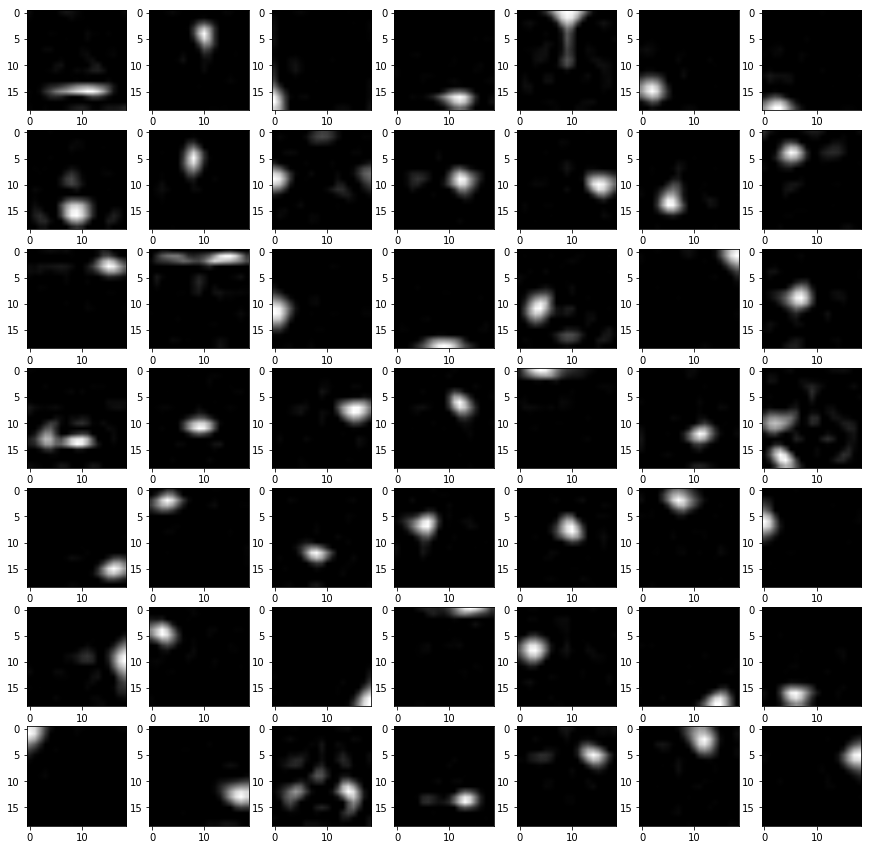

In [9]:
f, axarr = plt.subplots(int(np.sqrt(q)), int(np.sqrt(q)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(q))):
    for i in range(int(np.sqrt(q))):
        axarr[i, j].imshow(W_q[comp_ix].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
        comp_ix += 1

## 4. Reconstructing an image

In [10]:
# Do you understand what's happening here?

X_sample_rec_nmf = np.dot(Z[50], W_q)

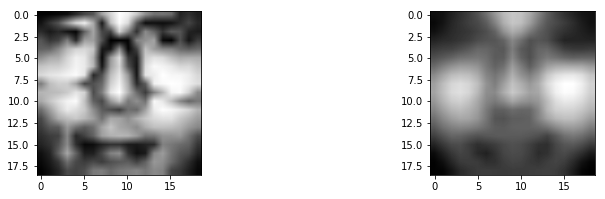

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[:,50].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")